Imports models: (LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, SupportVectorMachine, GaussianNB, MultinomialNb, BernouliNB, AdaBoostClaassifier)

In [110]:
import numpy as np
import pandas as pd
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, log_loss
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

#
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier

- Read files


In [111]:
dataframe = pd.read_csv("C:/Users/Rohan Mahesh Rao/Desktop/Dip/Image-Despeckling/spreadsheets/Dataset_new.csv")
dataframe.head()

,Image_number,Hue,Sat,Val,SSIM,Kernel_width,Std_dev,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1,5,8,5,0.505,7,81,NaN,NaN,NaN
1,2,5,8,6,0.476,7,99,NaN,NaN,NaN
2,3,5,6,6,0.529,7,74,NaN,NaN,NaN
3,4,5,8,4,0.431,8,64,NaN,NaN,NaN
4,5,5,8,3,0.508,8,56,NaN,NaN,NaN


- Preprocessing

In [112]:
dataframe = dataframe.sample(frac = 1) # to shuffle the dataset 
y = dataframe['Kernel_width']
feature_names = ['Hue','Sat','Val','Std_dev']
x = dataframe[feature_names]
x.head()

,Hue,Sat,Val,Std_dev
588,5,8,5,88
1438,5,7,7,89
1249,5,7,7,105
125,5,7,4,58
53,5,7,7,79


Train-Test split

In [113]:
x = np.asarray(x).astype('float32')
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True)

Fitting and Defining Classifier functions

In [114]:

model1 = LogisticRegression(solver='liblinear', C=1.0)
model2 = DecisionTreeClassifier(criterion='gini', max_depth=None)
model3 = RandomForestClassifier(n_estimators=100, max_features='auto')
model4 = SVC(C=1.0, kernel='rbf')
model5 = MultinomialNB()
model6 = BernoulliNB()

model_list = [model1,model2,model3,model4,model5,model6]

#training
model1.fit(x_train, y_train)
pred1 = model1.predict(x_test)
model2.fit(x_train, y_train)
pred2 = model2.predict(x_test)
model3.fit(x_train, y_train)
pred3 = model3.predict(x_test)
model4.fit(x_train, y_train)
pred4 = model4.predict(x_test)
model5.fit(x_train, y_train)
pred5 = model5.predict(x_test)
model6.fit(x_train, y_train)
pred6 = model6.predict(x_test)

def get_kernel1(x_given):
    return model1.predict(x_given)
def get_kernel2(x_given):
    return model2.predict(x_given)
def get_kernel3(x_given):
    return model3.predict(x_given)
def get_kernel4(x_given):
    return model4.predict(x_given)
def get_kernel5(x_given):
    return model5.predict(x_given)
def get_kernel6(x_given):
    return model6.predict(x_given)

c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Predicting widow size for filter using the models defined above

In [118]:
hsv_inputs = open("C:/Users/Rohan Mahesh Rao/Desktop/Dip/Image-Despeckling/hsv_inputs.txt","r")
x_inp = str(hsv_inputs.read())
print("X values obtained : ",x_inp)
x_given = []

for i in range (0,4):
    x_given.append(int(x_inp[i]))

print(x_given)

pre1 = get_kernel1([x_given])
print("Predicted kernel size for 1 :",round(pre1[0]))
pre2 = get_kernel2([x_given])
print("Predicted kernel size for 2 :",round(pre2[0]))
pre3 = get_kernel3([x_given])
print("Predicted kernel size for 3 :",round(pre3[0]))
pre4 = get_kernel4([x_given])
print("Predicted kernel size for 4 :",round(pre4[0]))
pre5 = get_kernel5([x_given])
print("Predicted kernel size for 5 :",round(pre5[0]))
pre6 = get_kernel6([x_given])
print("Predicted kernel size for 6 :",round(pre6[0]))


file = open("predicted_kernel.txt", "w")
file.write(str(pre1[0]))
file.close()



X values obtained :  5670
[5, 6, 7, 0]
Predicted kernel size for 1 : 7
Predicted kernel size for 2 : 3
Predicted kernel size for 3 : 8
Predicted kernel size for 4 : 8
Predicted kernel size for 5 : 8
Predicted kernel size for 6 : 8


Performance Metrics (MeanSquaredError, RootMeanSquareError, MeanAbsoluteError, R2score)

In [119]:
error_table = PrettyTable()
error_table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "MSE", "RMSE", "MAE", "R2 Score"]

models = [model1, model2, model3, model4, model5, model6]
preds = [pred1, pred2, pred3, pred4, pred5, pred6]

for model, pred in zip(models, preds):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    error_table.add_row([model.__class__.__name__, accuracy, precision, recall, f1, mse, rmse, mae, r2])
    
print(error_table)


+------------------------+--------------------+---------------------+--------------------+---------------------+--------------------+--------------------+--------------------+---------------------+
|         Model          |      Accuracy      |      Precision      |       Recall       |       F1 Score      |        MSE         |        RMSE        |        MAE         |       R2 Score      |
+------------------------+--------------------+---------------------+--------------------+---------------------+--------------------+--------------------+--------------------+---------------------+
|   LogisticRegression   | 0.6479750778816199 |  0.533122640599276  | 0.6479750778816199 |  0.5330443935887765 | 1.5202492211838006 | 1.2329838689876687 | 0.6355140186915887 | -0.3013441440842708 |
| DecisionTreeClassifier | 0.5545171339563862 |  0.5356155070624938 | 0.5545171339563862 |  0.5428587015680016 | 2.0965732087227416 | 1.4479548365618113 | 0.838006230529595  | -0.7946815757555621 |
| RandomFo

c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\metrics

Data Visualisation

c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Rohan Mahesh

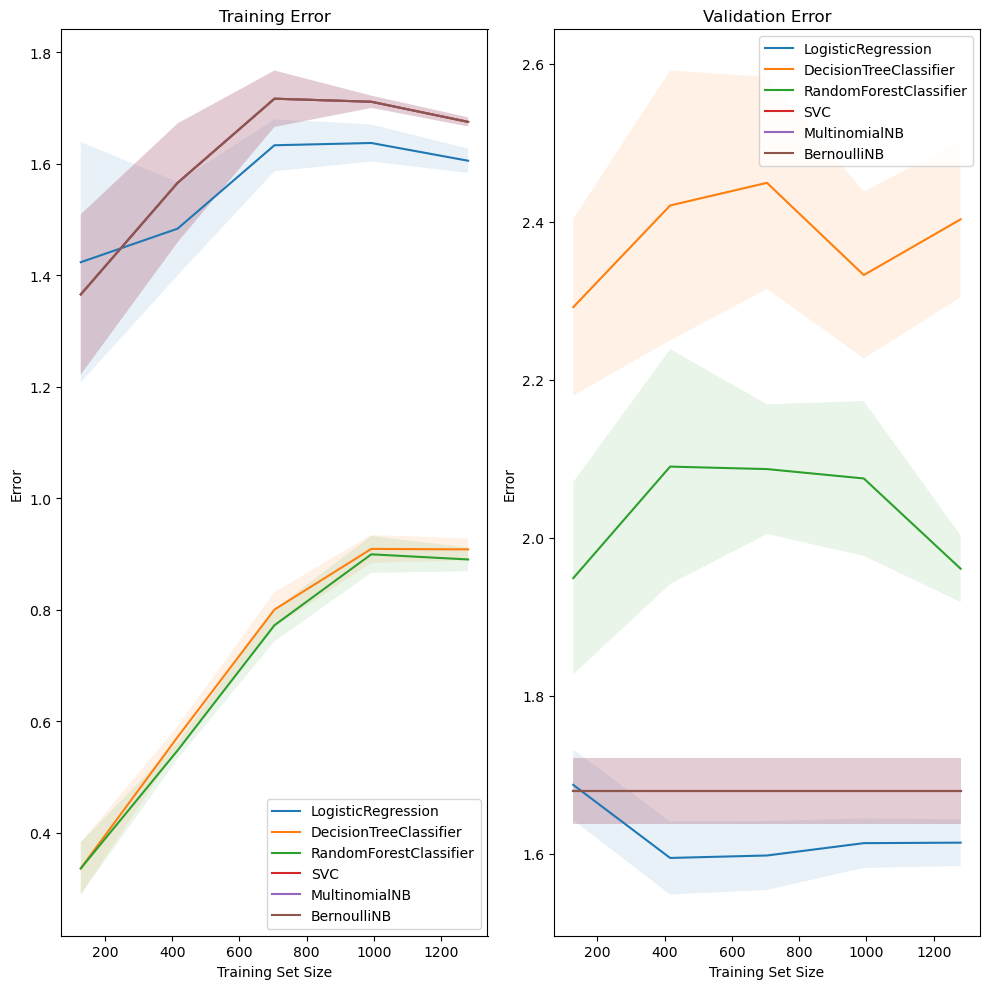

In [120]:

def plot_learning_curves():
    plt.figure(figsize=(10, 10))
    
    # Plot for Training Error
    plt.subplot(1, 2, 1)
    for classifier in model_list:
        train_sizes, train_scores, _ = learning_curve(classifier, x, y, cv=5, scoring='neg_mean_squared_error')
        train_mean = -np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        plt.plot(train_sizes, train_mean, label=classifier.__class__.__name__)
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    
    plt.title('Training Error')
    plt.xlabel('Training Set Size')
    plt.ylabel('Error')
    plt.legend()

    # Plot for Validation Error
    plt.subplot(1, 2, 2)
    for classifier in model_list:
        _, _, valid_scores = learning_curve(classifier, x, y, cv=5, scoring='neg_mean_squared_error')
        valid_mean = -np.mean(valid_scores, axis=1)
        valid_std = np.std(valid_scores, axis=1)
        plt.plot(train_sizes, valid_mean, label=classifier.__class__.__name__)
        plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

    plt.title('Validation Error')
    plt.xlabel('Training Set Size')
    plt.ylabel('Error')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_learning_curves()


